Para facilitar nossa análise, vamos simplificar um pouco e usar uma função hipótese com apenas um parâmetro

$\hat{𝑦}(𝑖)=ℎ(𝑥_1(𝑖))=𝑎_1𝑥_1(𝑖)$

In [101]:
# Import all the necessary libraries.
import random
import matplotlib.pyplot as plt
import math
import numpy as np
import functools
from matplotlib import cm


"""
Generate data points for plotting the error surface.
"""
def calculateErrorSurface(y, X):
    # Generate values for parameter space.
    N = 200
    a0 = np.linspace(-30.0, 34.0, N)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((N,N))
    for iter1 in range(0, N):
        yhat = a0[iter1]*X
        J[iter1] = (1/M)*np.sum( np.square(y - yhat)  )
               
    return J, a0
            
"""
Calculate closed-form solution using the normal equation.
"""
def calculateClosedFormSolution(X):
    # Closed-form solution.
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    yhat = a_opt[0]*X
    Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )
    
    return Joptimum, a_opt

"""
Batch gradient descent solution.
"""
def GradientDescent(alpha, n_iterations, X_b, X, y):
    # Random initialization of parameters.
    maxNumIter = 10000
    alpha = 0.01

    a = np.zeros(maxNumIter)
    Jgd = np.zeros(maxNumIter)

    a[0] = -30
    yhat = a[0]*X

    Jgd[0] = (1/M)*np.sum(np.power((y-yhat),2))

    error = 1 
    iter = 0
    while(error>0.001 and iter <maxNumIter-1):
        yhat = a[iter]*X
        update = -(2/M)*np.transpose((y-yhat)).dot(X)
        a_aux = a[iter]-alpha*np.transpose(update)
        a[iter+1] = a_aux[0]
        yhat = a[iter+1]*X
        Jgd[iter+1] = (1/M)*sum(np.power((y-yhat),2))
        error = np.abs(Jgd[iter]-Jgd[iter+1])
        iter = iter+1
        
    return a, Jgd, iter

"""
Hypothesis Function
"""
def h(X_b, a):
    return a.T.dot(X_b.T)


In [102]:
# Número de exemplos
M = 10000
X = 10 * np.random.rand(M, 1)
y = 2 * X + 10*np.random.randn(M, 1)

# Concatenação dos vetores
X_b = X

# Solução Gradiente descendente em batelada.
alpha = 0.001 # Taxa de aprendizagem
n_iterations = 10000

# Calculo os pesos que irão compor a superfície de erros.
J, a0 = calculateErrorSurface(y, X) # Aplicando a função definida acima

# Calculo de 'a' ótimo que minimiza a função de erro (J).
Joptimum, a_opt = calculateClosedFormSolution(X_b)

# Rodando o algoritmo do Gradiente descendente em batelada.
a, Jgd, iter = GradientDescent(alpha, n_iterations, X_b, X, y)

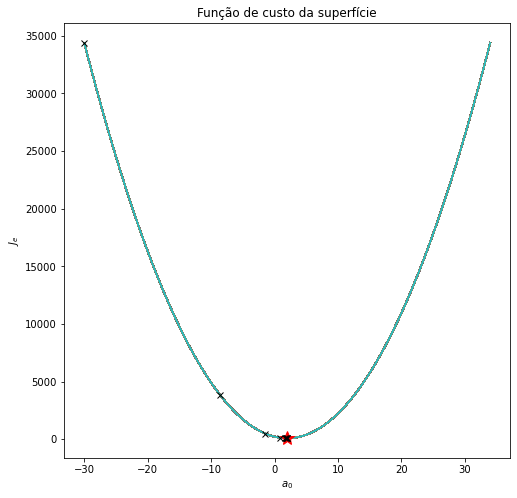

In [103]:
fig = plt.figure(figsize=(8,8))
plt.plot(a0,J)
plt.xlabel('$a_0$')
plt.ylabel('$J_e$')
plt.title('Função de custo da superfície')
plt.plot(a_opt[0], Joptimum, c='r', marker ='*',markersize=14)
plt.plot(a[0:iter], Jgd[0:iter], 'kx')

Text(0.5, 1.0, 'Error vs. Iteration number')

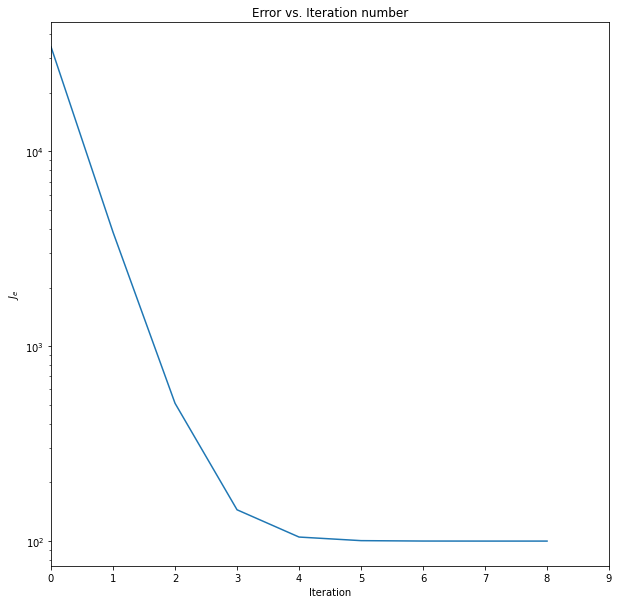

In [104]:
fig = plt.figure(figsize=(10,10))

plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')